<a href="https://colab.research.google.com/github/amirkasaei/Modified-Human-Sperm-Morphology-Analysis/blob/main/Modified_Human_Sperm_Morphology_Analysis_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

## **Torch**

In [31]:
!pip install -q torcheval

In [32]:
# pip install -q --upgrade torch

In [33]:
# pip install -q --upgrade torch torchvision

In [34]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torcheval
from torcheval.metrics.functional import binary_accuracy
from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage, Normalize

# PyTorch TensorBoard support
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

## **Others**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.model_selection import KFold

import copy
import imageio
import PIL.Image as Image

import os
import sys
import time

In [36]:
# !pip install numba

# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()


## **learn2learn**

In [23]:
# !git clone https://github.com/learnables/learn2learn

In [24]:
# !pip install learn2learn

In [25]:
# import learn2learn as l2l
# from learn2learn.data.transforms import (NWays, KShots, LoadData, RemapLabels, ConsecutiveLabels)

## **Drive**

In [40]:
!git clone https://github.com/amirkasaei/Modified-Human-Sperm-Morphology-Analysis/
path="/content/Modified-Human-Sperm-Morphology-Analysis/mhsma-dataset/mhsma/"

fatal: destination path 'Modified-Human-Sperm-Morphology-Analysis' already exists and is not an empty directory.


# **Preprocessing**

## **Load Data**

In [41]:
x_train = np.load(path + 'x_128_train.npy').astype('float32')
y_acrosome_train = np.load(path + 'y_acrosome_train.npy').astype('float32')
y_head_train = np.load(path + 'y_head_train.npy').astype('float32')
y_tail_train = np.load(path + 'y_tail_train.npy').astype('float32')
y_vacuole_train = np.load(path + 'y_vacuole_train.npy').astype('float32')

x_valid = np.load(path+'x_128_valid.npy').astype('float32')
y_acrosome_valid = np.load(path + 'y_acrosome_valid.npy').astype('float32')
y_head_valid = np.load(path + 'y_head_valid.npy').astype('float32')
y_tail_valid = np.load(path + 'y_tail_valid.npy').astype('float32')
y_vacuole_valid = np.load(path + 'y_vacuole_valid.npy').astype('float32')

x_test = np.load(path+'x_128_test.npy').astype('float32')
y_acrosome_test = np.load(path + 'y_acrosome_test.npy').astype('float32')
y_head_test = np.load(path + 'y_head_test.npy').astype('float32')
y_tail_test = np.load(path + 'y_tail_test.npy').astype('float32')
y_vacuole_test = np.load(path + 'y_vacuole_test.npy').astype('float32')

print('x_train shape:', x_train.shape, '----- y_acrosome_train shape:', y_acrosome_train.shape)
print('x_valid shape:', x_valid.shape, '----- y_acrosome_valid shape:', y_acrosome_valid.shape)
print('x_test shape:', x_test.shape, '----- y_acrosome_test shape:', y_acrosome_test.shape)

x_train shape: (1000, 128, 128) ----- y_acrosome_train shape: (1000,)
x_valid shape: (240, 128, 128) ----- y_acrosome_valid shape: (240,)
x_test shape: (300, 128, 128) ----- y_acrosome_test shape: (300,)


In [42]:
np.count_nonzero(y_head_train == 0)/y_head_train.shape[0]

0.727

## **Reshape Data**

In [43]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
# y_acrosome_train = y_acrosome_train.reshape((-1,1))
# y_head_train = y_head_train.reshape((-1,1))
# y_tail_train = y_tail_train.reshape((-1,1))
# y_vacuole_train = y_vacuole_train.reshape((-1,1))

x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1))
# y_acrosome_valid = y_acrosome_valid.reshape((-1,1))
# y_head_valid = y_head_valid.reshape((-1,1))
# y_tail_valid = y_tail_valid.reshape((-1,1))
# y_vacuole_valid = y_vacuole_valid.reshape((-1,1))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# y_acrosome_test = y_acrosome_test.reshape((-1,1))
# y_head_test = y_head_test.reshape((-1,1))
# y_tail_test = y_tail_test.reshape((-1,1))
# y_vacuole_test = y_vacuole_test.reshape((-1,1))

In [44]:
input_shape = x_train.shape[1:]
input_shape

(128, 128, 1)

## **Torch**

In [45]:
y_acrosome_train_tensor = torch.from_numpy(y_acrosome_train)
y_head_train_tensor = torch.from_numpy(y_head_train)
y_tail_train_tensor = torch.from_numpy(y_tail_train)
y_vacuole_train_tensor = torch.from_numpy(y_vacuole_train)

y_acrosome_valid_tensor = torch.from_numpy(y_acrosome_valid)
y_head_valid_tensor = torch.from_numpy(y_head_valid)
y_tail_valid_tensor = torch.from_numpy(y_tail_valid)
y_vacuole_valid_tensor = torch.from_numpy(y_vacuole_valid)

y_acrosome_test_tensor = torch.from_numpy(y_acrosome_test)
y_head_test_tensor = torch.from_numpy(y_head_test)
y_tail_test_tensor = torch.from_numpy(y_tail_test)
y_vacuole_test_tensor = torch.from_numpy(y_vacuole_test)


In [46]:
Tensor = transforms.Compose([
    ToTensor()
])

PILimage = transforms.Compose([
    ToPILImage()
])

In [47]:
x_train_tensor = torch.stack([Tensor(img) for img in x_train])

x_valid_tensor = torch.stack([Tensor(img) for img in x_valid])

x_test_tensor = torch.stack([Tensor(img) for img in x_test])

## **Data Normalization**

### **Mean**

In [48]:
mean_train = x_train_tensor.view(1, -1).mean(dim=1)
mean_valid = x_valid_tensor.view(1, -1).mean(dim=1)
mean_test = x_test_tensor.view(1, -1).mean(dim=1)

### **Standard Deviation**

In [49]:
std_train = x_train_tensor.view(1, -1).std(dim=1)
std_valid = x_valid_tensor.view(1, -1).std(dim=1)
std_test = x_test_tensor.view(1, -1).std(dim=1)

### **Normalizarion**

In [50]:
Normalizer = Normalize(mean_train, std_train)
x_train_norm = Normalizer(x_train_tensor)

In [51]:
Normalizer = Normalize(mean_valid, std_valid)
x_valid_norm = Normalizer(x_valid_tensor)

In [52]:
Normalizer = Normalize(mean_test, std_test)
x_test_norm = Normalizer(x_test_tensor)

## **Data Augmentation**

## **RGB**

In [53]:
x_train_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_train_tensor])

x_valid_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_valid_tensor])

x_test_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_test_tensor])

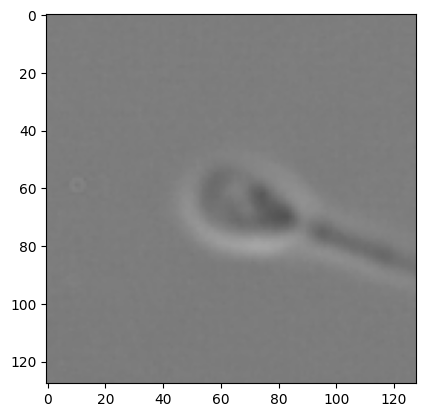

In [54]:

plt.imshow(PILimage(x_train_rgb[0]))

## **Data Loader**

### **Dataset Class**

In [55]:
class MHSMADataset(Dataset):
  def __init__(self, x, y, transform=None, target_transform=None):
    self.img_labels = y
    self.imgs = x
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    image = self.imgs[idx]
    label = self.img_labels[idx]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### **Default Dataloader**

In [56]:
train_data = MHSMADataset(x=x_train_tensor, y=y_head_train_tensor)

valid_data = MHSMADataset(x=x_valid_tensor, y=y_head_valid_tensor)

test_data = MHSMADataset(x=x_test_tensor, y=y_head_test_tensor)

In [57]:
dataset_sizes = {}

dataset_sizes['train'] = len(train_data)
dataset_sizes['valid'] = len(valid_data)
dataset_sizes['test'] = len(test_data)

In [58]:
batch_size=64

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [59]:
dataloaders = {}

dataloaders['train'] = train_dataloader
dataloaders['valid'] = valid_dataloader
dataloaders['test'] = test_dataloader

In [60]:
dataloader_sizes = {}

dataloader_sizes['train'] = len(train_dataloader)
dataloader_sizes['valid'] = len(valid_dataloader)
dataloader_sizes['test'] = len(test_dataloader)

### **RGB Dataloader**

In [61]:
train_data_rgb = MHSMADataset(x=x_train_rgb, y=y_head_train_tensor)

valid_data_rgb = MHSMADataset(x=x_valid_rgb, y=y_head_valid_tensor)

test_data_rgb = MHSMADataset(x=x_test_rgb, y=y_head_test_tensor)

In [62]:
batch_size=64

train_dataloader_rgb = DataLoader(train_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)
valid_dataloader_rgb = DataLoader(valid_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader_rgb = DataLoader(test_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [63]:
dataloaders_rgb = {}

dataloaders_rgb['train'] = train_dataloader_rgb
dataloaders_rgb['valid'] = valid_dataloader_rgb
dataloaders_rgb['test'] = test_dataloader_rgb

In [64]:
dataloader_rgb_sizes = {}

dataloader_rgb_sizes['train'] = len(train_dataloader_rgb)
dataloader_rgb_sizes['valid'] = len(valid_dataloader_rgb)
dataloader_rgb_sizes['test'] = len(test_dataloader_rgb)

In [65]:
train_batch_num = len(train_dataloader)

In [66]:
# train_features, train_labels = next(iter(train_dataloader))

# **Models**

## **Helper Functions**

In [94]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### **Training**

In [95]:
def train_model(model, criterion, optimizer, scheduler, dataloader, dataloader_size, num_epochs=25):
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 20)

    # Each epoch has a training and validation phase
    for phase in ['train', 'valid']:
      if phase == 'train':
        model.train()  # Set model to training mode
      else:
        model.eval()   # Set model to evaluate mode

      running_loss = 0.0
      running_corrects = 0
      # running_acc = 0.0
      
      # Iterate over data.
      for inputs, labels in dataloader[phase]:
        inputs = inputs.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        # track history if only in train
        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          # acc = binary_accuracy(outputs.reshape(outputs.shape[0]), labels.reshape(labels.shape[0]), threshold=0.5)

          # backward + optimize only if in training phase
          if phase == 'train':
            loss.backward()
            optimizer.step()

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        # running_acc += acc

        # if phase == 'train':
        #   scheduler.step()

      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double() / dataset_sizes[phase]
      # epoch_acc = running_acc / dataset_sizes[phase]

      print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

      # deep copy the model
      if phase == 'valid' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())

    print()

  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model

### **Evaluation**

In [96]:
def evaluate_model(model, criterion, dataloader, dataloader_size):
  since = time.time()

  print('-' * 20)

  # Each epoch has a training and validation phase
  model.eval()   # Set model to evaluate mode

  running_loss = 0.0
  running_corrects = 0
  # running_acc = 0.0
    
  # Iterate over data.
  for inputs, labels in dataloader['test']:
    inputs = inputs.to(device)
    labels = labels.type(torch.LongTensor).to(device)

    # forward
    # track history if only in train
    with torch.set_grad_enabled(False):
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)

    # statistics
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

  eval_loss = running_loss / dataset_sizes['test']
  eval_acc = running_corrects.double() / dataset_sizes['test']

  print(f'test Loss: {eval_loss:.4f} Acc: {eval_acc:.4f}')

## **VGG**

### **Configuration**

In [97]:
vgg = torchvision.models.vgg19(pretrained=True)
vgg.train().classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [70]:
# for param in vgg.features.parameters():
#     param.require_grad = False

In [98]:
# num_ftrs = vgg.classifier[6].in_features
# vgg.classifier[6] =  nn.Linear(num_ftrs, 1024)
# vgg.classifier.append(nn.ReLU(inplace=True))
# vgg.classifier.append(nn.Dropout(0.9))
# vgg.classifier.append(nn.Linear(1024, 1))
# vgg.classifier.append(nn.Sigmoid())

num_ftrs = vgg.classifier[0].in_features
vgg.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 2048),
    nn.ReLU(),
    nn.Dropout(0.9),
    nn.Linear(2048, 1024),
    nn.Sigmoid(),
    nn.Dropout(0.9),
    nn.Linear(1024, 2)
)

vgg.train().classifier

Sequential(
  (0): Linear(in_features=25088, out_features=2048, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2048, out_features=1024, bias=True)
  (3): Sigmoid()
  (4): Dropout(p=0.9, inplace=False)
  (5): Linear(in_features=1024, out_features=2, bias=True)
)

In [99]:
vgg = vgg.to(device)

learning_rate = 1e-2
epochs = 100

# criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()
# accuracy = metrics.accuracy_score()

# Observe that all parameters are being optimized
# optimizer = torch.optim.Adam(vgg.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(vgg.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adadelta(vgg.parameters(), lr=learning_rate)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

### **Train**

In [102]:
vgg = train_model(vgg, criterion,optimizer, exp_lr_scheduler, dataloaders_rgb, dataloader_rgb_sizes, num_epochs=epochs)

Epoch 1/100
--------------------
train Loss: 0.7484 Acc: 0.6370
valid Loss: 0.5802 Acc: 0.7333

Epoch 2/100
--------------------
train Loss: 0.7115 Acc: 0.6430
valid Loss: 0.5809 Acc: 0.7333

Epoch 3/100
--------------------
train Loss: 0.6973 Acc: 0.6590
valid Loss: 0.5947 Acc: 0.7333

Epoch 4/100
--------------------
train Loss: 0.6755 Acc: 0.6690
valid Loss: 0.5774 Acc: 0.7333

Epoch 5/100
--------------------
train Loss: 0.6506 Acc: 0.6800
valid Loss: 0.5766 Acc: 0.7333

Epoch 6/100
--------------------
train Loss: 0.6478 Acc: 0.6780
valid Loss: 0.5587 Acc: 0.7333

Epoch 7/100
--------------------
train Loss: 0.6360 Acc: 0.6780
valid Loss: 0.5825 Acc: 0.7333

Epoch 8/100
--------------------
train Loss: 0.6215 Acc: 0.7100
valid Loss: 0.6185 Acc: 0.7333

Epoch 9/100
--------------------
train Loss: 0.6077 Acc: 0.7150
valid Loss: 0.5438 Acc: 0.7333

Epoch 10/100
--------------------
train Loss: 0.5946 Acc: 0.7160
valid Loss: 0.5584 Acc: 0.7417

Epoch 11/100
--------------------
train

### **Evaluarte**

In [103]:
evaluate_model(vgg, criterion, dataloaders_rgb, dataloader_rgb_sizes)

--------------------
test Loss: 0.7754 Acc: 0.7967


## **ViT**

In [ ]:
vit = torchvision.models.vit_b_16(pretrained=True)

In [ ]:
vit.train().heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [ ]:
num_ftrs = vit.heads.head.in_features
vit.heads =  nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 1),
    nn.Sigmoid()
)


In [ ]:
vit.train().heads

In [ ]:
vit = vit.to(device)

In [ ]:
learning_rate = 1e-2
epochs = 20

criterion = nn.BCELoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(vit.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(vgg.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = torch.optim.Adadelta(vgg.parameters(), lr=learning_rate, weight_decay=0.95)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
vit = train_model(vit, criterion, optimizer, exp_lr_scheduler, dataloaders_rgb, dataloader_rgb_sizes, num_epochs=epochs)

Epoch 1/20
--------------------
train Loss: 23.5471 Acc: 0.7256
valid Loss: 27.7344 Acc: 0.7227

Epoch 2/20
--------------------
train Loss: 26.9531 Acc: 0.7305
valid Loss: 26.5625 Acc: 0.7344

Epoch 3/20
--------------------
train Loss: 26.6602 Acc: 0.7334
valid Loss: 25.3906 Acc: 0.7461

Epoch 4/20
--------------------
train Loss: 28.1250 Acc: 0.7188
valid Loss: 26.5625 Acc: 0.7344

Epoch 5/20
--------------------
train Loss: 27.5391 Acc: 0.7246
valid Loss: 26.9531 Acc: 0.7305

Epoch 6/20
--------------------
train Loss: 27.2461 Acc: 0.7275
valid Loss: 27.7344 Acc: 0.7227

Epoch 7/20
--------------------
train Loss: 27.2461 Acc: 0.7275
valid Loss: 27.3438 Acc: 0.7266

Epoch 8/20
--------------------
train Loss: 26.6602 Acc: 0.7334
valid Loss: 26.5625 Acc: 0.7344

Epoch 9/20
--------------------
train Loss: 27.2461 Acc: 0.7275
valid Loss: 26.5625 Acc: 0.7344

Epoch 10/20
--------------------
train Loss: 27.5391 Acc: 0.7246
valid Loss: 26.1719 Acc: 0.7383

Epoch 11/20
-----------------

## **CNN**

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3)
    self.pool = nn.MaxPool2d(2, 2)
    self.flatten = nn.Flatten()
    self.linrear1 = nn.Linear(in_features=16 * 30 * 30, out_features=128)
    self.linrear2 = nn.Linear(in_features=128, out_features=32)
    self.output = nn.Linear(in_features=32, out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid() 

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(-1, 16 * 30 * 30)
    x = self.flatten(x)
    x = self.relu(self.linrear1(x))
    x = self.relu(self.linrear2(x))
    x = self.sigmoid(self.output(x))
    return x


In [ ]:
model = CNN()

In [ ]:
model = model.to(device)

In [ ]:
learning_rate = 1e-3
epochs = 100

criterion = nn.BCELoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, dataloader_sizes, num_epochs=epochs)